# Introduction

<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

### Install Package with Country Codes

In [ ]:
%pip install iso3166

### Upgrade Plotly

Run the cell below if you are working with Google Colab.

In [ ]:
%pip install --upgrade plotly

### Import Statements

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import re



# These might be helpful:
# from iso3166 import countries
from datetime import datetime, timedelta

### Notebook Presentation

In [ ]:
pd.options.display.float_format = '{:,.2f}'.format

### Load the Data

In [ ]:
df_data = pd.read_csv('mission_launches.csv')

# Preliminary Data Exploration

* What is the shape of `df_data`?
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [ ]:
df_data.shape

(6711, 8)

In [ ]:
df_data.columns

Index(['Unnamed: 0', 'Organisation', 'Location', 'Datetime', 'Details',
       'Status', 'Price', 'Mission_status'],
      dtype='object')

In [ ]:
df_data_nan = df_data.isna().sum().sum()
print(f"There are {df_data_nan} NaN objects in the dataset.")
duplicate_count = df_data.duplicated().sum()
print(f"The number of duplicate rows in the dataset is: {duplicate_count}")

There are 4074 NaN objects in the dataset.
The number of duplicate rows in the dataset is: 0


## Data Cleaning - Check for Missing Values and Duplicates

Consider removing columns containing junk data.

In [ ]:
df_data_clean = df_data.drop(columns="Unnamed: 0")

df_data_clean.columns

Index(['Organisation', 'Location', 'Datetime', 'Details', 'Status', 'Price',
       'Mission_status'],
      dtype='object')

## Descriptive Statistics

In [ ]:
df_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6711 entries, 0 to 6710
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Organisation    6711 non-null   object 
 1   Location        6711 non-null   object 
 2   Datetime        6711 non-null   object 
 3   Details         6711 non-null   object 
 4   Status          6711 non-null   object 
 5   Price           2637 non-null   float64
 6   Mission_status  6711 non-null   object 
dtypes: float64(1), object(6)
memory usage: 367.1+ KB


# Number of Launches per Company

Create a chart that shows the number of space mission launches by organisation.

In [ ]:
organisation_counts = df_data_clean['Organisation'].value_counts()
print(organisation_counts)

Organisation
RVSN USSR           2476
US Air Force         549
CASC                 523
Roscosmos            363
VKS RF               342
                    ... 
OneSpace               1
GK LS                  1
Space Pioneer          1
Relativity Space       1
ABL SS                 1
Name: count, Length: 66, dtype: int64


In [ ]:
fig = px.pie(labels=organisation_counts.values, values=organisation_counts.values, title="Number of Launches by Organisation", names=organisation_counts.index)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

# Number of Active versus Retired Rockets

How many rockets are active compared to those that are decomissioned?

In [ ]:
rocket_status_count = df_data_clean['Status'].value_counts()
print(rocket_status_count)

Status
Retired    5240
Active     1471
Name: count, dtype: int64


In [ ]:
bar = px.bar(x=rocket_status_count.index, y=rocket_status_count.values,color=rocket_status_count.values ,color_continuous_scale="Aggrnyl")
bar.update_layout(xaxis_title="Status", yaxis_title="Number of Rockets Active/Decomissioned")
bar.show()

# Distribution of Mission Status

How many missions were successful?
How many missions failed?

In [ ]:
mission_success_count = df_data_clean['Mission_status'].value_counts()
print(mission_success_count)

Mission_status
Success              6134
Failure               455
Partial Failure       114
Prelaunch Failure       8
Name: count, dtype: int64


In [ ]:
bar = px.bar(x=mission_success_count.index, y=mission_success_count.values, color=mission_success_count.values, color_continuous_scale="agsunset")
bar.update_layout(xaxis_title="Mission Status", yaxis_title="Number of Missions")
bar.show()

# How Expensive are the Launches?

Create a histogram and visualise the distribution. The price column is given in USD millions (careful of missing values).

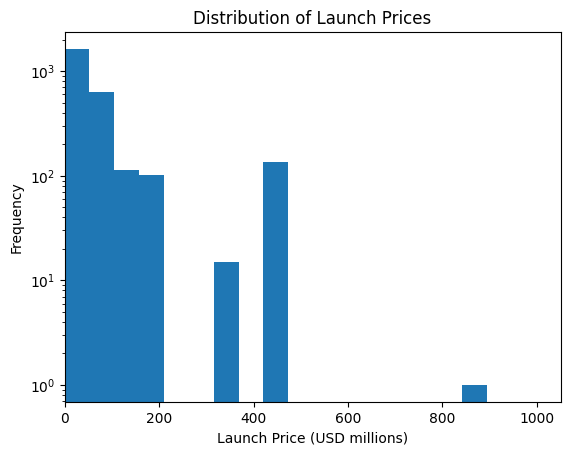

In [ ]:
df_data_clean_price = df_data_clean.dropna(subset=['Price'])

# Create a histogram of the launch prices
plt.hist(df_data_clean_price['Price'], bins=np.linspace(0, 1000, 20))
plt.xlabel('Launch Price (USD millions)')
plt.ylabel('Frequency')
plt.xlim(0, None)
plt.yscale('log')
plt.title('Distribution of Launch Prices')
plt.show()


# Use a Choropleth Map to Show the Number of Launches by Country

* Create a choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/)
* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map.
* You'll need to extract a `country` feature as well as change the country names that no longer exist.

Wrangle the Country Names

You'll need to use a 3 letter country code for each country. You might have to change some country names.

* Russia is the Russian Federation
* New Mexico should be USA
* Yellow Sea refers to China
* Shahrud Missile Test Site should be Iran
* Pacific Missile Range Facility should be USA
* Barents Sea should be Russian Federation
* Gran Canaria should be USA


You can use the iso3166 package to convert the country names to Alpha3 format.

In [ ]:
df_data_clean['Location'] = df_data_clean['Location'].replace({
    'Russia': 'Russian Federation',
    'New Mexico': 'USA',
    'Yellow Sea': 'China',
    'Shahrud Missile Test Site': 'Iran',
    'Pacific Missile Range Facility': 'USA',
    'Barents Sea': 'Russian Federation',
    'Gran Canaria': 'USA'
})

In [ ]:
launches_by_country = df_data_clean['Location'].value_counts
print(launches_by_country)

<bound method IndexOpsMixin.value_counts of 0                  Site 43/4, Plesetsk Cosmodrome, Russia
1                SLC-40, Cape Canaveral SFS, Florida, USA
2       Bo Run Jiu Zhou Barge (Area 2), China Coastal ...
3            LC-3, Xichang Satellite Launch Center, China
4          Rocket Lab LC-1B, Māhia Peninsula, New Zealand
                              ...                        
6706             LC-18A, Cape Canaveral SFS, Florida, USA
6707             LC-26A, Cape Canaveral SFS, Florida, USA
6708             LC-18A, Cape Canaveral SFS, Florida, USA
6709            Site 1/5, Baikonur Cosmodrome, Kazakhstan
6710            Site 1/5, Baikonur Cosmodrome, Kazakhstan
Name: Location, Length: 6711, dtype: object>


In [ ]:
df_data_clean['country'] = df_data_clean['Location'].str.split(',').str[-1].str.strip()
country = df_data_clean.country.value_counts()

world_map = px.choropleth(country, locations=country.index, locationmode='country names', color=country.values, color_continuous_scale=px.colors.sequential.matter)
world_map.show()

# Use a Choropleth Map to Show the Number of Failures by Country


In [ ]:
failures_df = df_data_clean[df_data_clean['Mission_status'] == 'Failure']
failures_by_country = failures_df['country'].value_counts()
failures_country_df = pd.DataFrame({'country': failures_by_country.index, 'failures': failures_by_country.values})

In [ ]:
world_map_failures = px.choropleth(failures_country_df, locations='country', locationmode='country names', color='failures', title='Number of Faulures by Country')
world_map_failures.show()

# Create a Plotly Sunburst Chart of the countries, organisations, and mission status.

In [ ]:
#.size(): The size() function returns the number of elements in each group,
# which corresponds to the number of missions for each unique combination of 'country', 'Organization', and 'Mission_Status'.

In [ ]:
#.reset_index(name='counts'): The reset_index() function resets the MultiIndex to columns, creating a new DataFrame with columns for 'country',
# 'Organization', 'Mission_Status', and 'counts'. The name parameter specifies the name of the new 'counts' column,
# which contains the number of missions for each unique combination of 'country', 'Organization', and 'Mission_Status'.

In [ ]:
sunburst_df = df_data_clean.groupby(['country', 'Organisation', 'Mission_status']).size().reset_index(name='counts')

In [ ]:
# Pivoting a DataFrame means reorganizing its data to form a new DataFrame with a different structure.
# In a pivot operation, you create a new row index, a new column index,
# and a value that determines the contents of each cell in the resulting DataFrame.

In [ ]:
sunburst_df_pivot = sunburst_df.pivot(index=['country', 'Organisation'], columns='Mission_status', values='counts')
sunburst_df_pivot = sunburst_df_pivot.reset_index()
sunburst_df_pivot = sunburst_df_pivot.rename(columns={'index': 'counts'})

In [ ]:
sunburst_df_pivot['counts'] = sunburst_df_pivot['Failure'] + sunburst_df_pivot['Partial Failure'] + sunburst_df_pivot['Prelaunch Failure'] + sunburst_df_pivot['Success']

In [ ]:
sunburst_df_success = sunburst_df_pivot[['country', 'Organisation', 'Success']]
sunburst_df_success.columns = ['country', 'Organisation', 'counts']

sunburst_chart = px.sunburst(sunburst_df_success,
                             path=['country', 'Organisation'],  # Hierarchy levels
                             values='counts',  # Column with the number of missions
                             title='Sunburst Chart: Countries, Organizations, and Successful Missions')

sunburst_chart.show()

# Analyse the Total Amount of Money Spent by Organisation on Space Missions

In [ ]:
df_price_sum = df_data_clean_price.groupby('Organisation')['Price'].sum().reset_index()
print(df_price_sum)

        Organisation     Price
0             ABL SS     12.00
1        Arianespace 18,920.00
2              Astra     17.50
3             Boeing  1,241.00
4               CASC 15,740.78
5              CASIC     17.40
6                EER     20.00
7                ESA     37.00
8           Eurockot    169.00
9             ExPace    190.00
10           Firefly     60.00
11             GK LS     23.00
12   Galactic Energy     48.18
13               ILS  5,610.00
14              ISRO  2,613.00
15              JAXA    156.00
16         Kosmotras    638.00
17          Lockheed    280.00
18               MHI  4,032.50
19   Martin Marietta    721.40
20              NASA 62,076.00
21          Northrop  4,520.00
22        OrienSpace     27.22
23         RVSN USSR 14,200.00
24  Relativity Space     12.00
25        Rocket Lab    322.50
26         Roscosmos  6,614.70
27            Sandia     15.00
28            SpaceX 20,427.00
29           Starsem    718.00
30               ULA 17,883.00
31      

In [ ]:
df_price_sum.Price = df_price_sum.Price * 1000000
bar = px.bar(x=df_price_sum.Organisation, y=df_price_sum.Price, color=df_price_sum.Price ,color_continuous_scale="bluered")
bar.update_layout(xaxis_title="Organization Name", yaxis_title="Total Money Spent in Millions")
bar.show()

# Analyse the Amount of Money Spent by Organisation per Launch

In [ ]:
df_price_average = df_data_clean_price.groupby('Organisation')['Price'].mean().reset_index()
df_price_average.Price = df_price_average.Price * 1000000
print(df_price_average)

        Organisation          Price
0             ABL SS  12,000,000.00
1        Arianespace 141,194,029.85
2              Astra   2,500,000.00
3             Boeing 177,285,714.29
4               CASC  39,549,698.49
5              CASIC   5,800,000.00
6                EER  20,000,000.00
7                ESA  37,000,000.00
8           Eurockot  13,000,000.00
9             ExPace   7,600,000.00
10           Firefly  15,000,000.00
11             GK LS  23,000,000.00
12   Galactic Energy   4,380,000.00
13               ILS  71,012,658.23
14              ISRO  33,500,000.00
15              JAXA  39,000,000.00
16         Kosmotras  29,000,000.00
17          Lockheed  35,000,000.00
18               MHI  93,779,069.77
19   Martin Marietta  80,155,555.56
20              NASA 453,109,489.05
21          Northrop  49,670,329.67
22        OrienSpace  27,220,000.00
23         RVSN USSR  21,613,394.22
24  Relativity Space  12,000,000.00
25        Rocket Lab   7,500,000.00
26         Roscosmos  30,342

In [ ]:
bar = px.bar(x=df_price_average.Organisation, y=df_price_average.Price, color=df_price_average.Price ,color_continuous_scale="blugrn")
bar.update_layout(xaxis_title="Organization Name", yaxis_title="Average Money Spent per Mission in Millions")
bar.show()

# Chart the Number of Launches per Year

In [ ]:
df_data_clean['year'] = df_data_clean['Datetime'].str.extract(r'(\d{4})', expand=False)


In [ ]:
df_data_clean['year'] = pd.to_datetime(df_data_clean['year'])

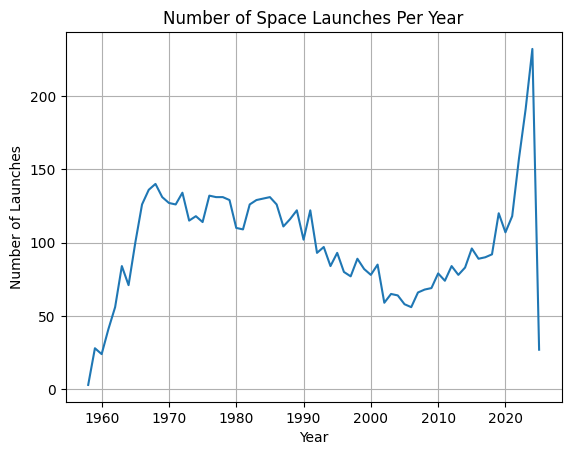

In [ ]:
df_launches_per_year = df_data_clean.resample('YE', on='year')['year'].count()

plt.plot(df_launches_per_year.index, df_launches_per_year.values)
plt.title('Number of Space Launches Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Launches')
plt.grid(True)
plt.show()

# Chart the Number of Launches Month-on-Month until the Present

Which month has seen the highest number of launches in all time? Superimpose a rolling average on the month on month time series chart.

In [ ]:
df_data_clean['Datetime'] = pd.to_datetime(df_data_clean['Datetime'], format='mixed', dayfirst=True, utc=True)
df_data_clean['Launch_Month'] = df_data_clean['Datetime'].dt.to_period('M')
df_monthly = df_data_clean.set_index('Launch_Month').reset_index()
df_monthly['Number_of_Launches'] = df_monthly.groupby('Launch_Month')['Datetime'].transform('count')

<ipython-input-34-659203cd6a96>:2: UserWarning:

Converting to PeriodArray/Index representation will drop timezone information.



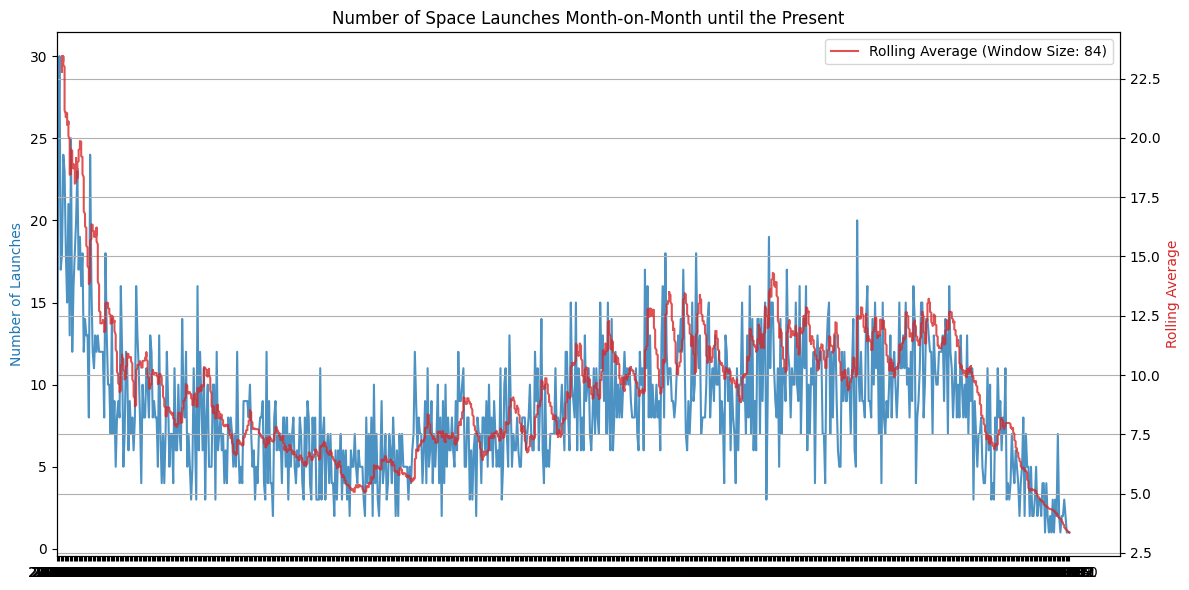

In [ ]:
plt.figure(figsize=(12, 6))
ax1 = plt.gca()
ax1.plot(df_monthly['Launch_Month'].astype(str), df_monthly['Number_of_Launches'], label='Original Data', color='tab:blue', alpha=0.8)
ax1.set_ylabel('Number of Launches', color='tab:blue')

# Calculate and plot the rolling average on the right y-axis
window_size = 84  # Change this value to set the window size for the rolling average
df_monthly['Rolling_Avg'] = df_monthly['Number_of_Launches'].rolling(window_size).mean()
ax2 = ax1.twinx()
ax2.plot(df_monthly['Launch_Month'].astype(str), df_monthly['Rolling_Avg'], label=f'Rolling Average (Window Size: {window_size})', color='tab:red', alpha=0.8)
ax2.set_ylabel('Rolling Average', color='tab:red')

plt.title('Number of Space Launches Month-on-Month until the Present')
plt.xlabel('Month')
plt.grid(True)
plt.xlim(0)
plt.legend()
plt.tight_layout()
plt.show()


# Launches per Month: Which months are most popular and least popular for launches?

Some months have better weather than others. Which time of year seems to be best for space missions?

In [ ]:
# Most popular month for launches in history
most_popular_month = df_data_clean['Launch_Month'].value_counts().index[0]
most_popular_launches = df_data_clean['Launch_Month'].value_counts()[most_popular_month]
print(f"Most popular month for launches: {most_popular_month} with {most_popular_launches} launches")

# Least popular month for launches in history
least_popular_month = df_data_clean['Launch_Month'].value_counts().index[-1]
least_popular_launches = df_data_clean['Launch_Month'].value_counts()[least_popular_month]
print(f"Least popular month for launches: {least_popular_month} with {least_popular_launches} launches")

Most popular month for launches: 2023-12 with 30 launches
Least popular month for launches: 1957-10 with 1 launches


# How has the Launch Price varied Over Time?

Create a line chart that shows the average price of rocket launches over time.

In [ ]:
df_data_clean.loc[:, 'Price_MA'] = df_data_clean['Price'].rolling(window=3).mean()


<Figure size 1200x600 with 0 Axes>

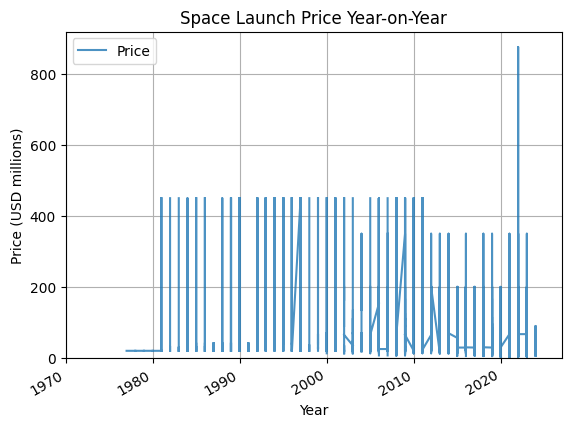

In [ ]:
plt.figure(figsize=(12, 6))
df_data_clean.plot(x='year', y='Price', kind='line', color='tab:blue', alpha=0.8, label='Price')
plt.title('Space Launch Price Year-on-Year')
plt.xlabel('Year')
plt.ylabel('Price (USD millions)')
plt.ylim(0)
plt.xlim(0)
plt.grid(True)
plt.legend()
plt.show()

# Chart the Number of Launches over Time by the Top 10 Organisations.

How has the dominance of launches changed over time between the different players?

In [ ]:
grouped_df = df_data_clean.groupby(['year', 'Organisation'])['Organisation'].count().reset_index(name='count')

top_orgs = grouped_df['Organisation'].value_counts().head(10).index
grouped_df_top10 = grouped_df[grouped_df['Organisation'].isin(top_orgs)]

# Pivot the dataframe to have 'year' as columns, 'Organisation' as rows, and 'count' as values
pivoted_df = grouped_df.pivot(index='Organisation', columns='year', values='count')

# Create a list of years for the x-axis
years = list(pivoted_df.columns)

# Create a list of trace objects for each organization
traces = []
for org in pivoted_df.index:
    trace = go.Scatter(
        x=years,
        y=pivoted_df.loc[org],
        mode='lines',
        name=org
    )
    traces.append(trace)

# Create the line chart
fig = go.Figure(data=traces)
fig.update_layout(title='Number of Launches per Year by Top Organizations', xaxis_title='Year', yaxis_title='Number of Launches')
fig.show()


# Cold War Space Race: USA vs USSR

The cold war lasted from the start of the dataset up until 1991.

In [ ]:
cold_war_df = df_data_clean[(df_data_clean['year'].astype(int) < 1991)]
cold_war_df.Datetime.nlargest(10)

,Datetime
5518,1970-12-25 03:50:00+00:00
5519,1970-12-22 21:30:00+00:00
5520,1970-12-18 16:15:00+00:00
5521,1970-12-18 09:39:00+00:00
5522,1970-12-16 04:29:00+00:00
5523,1970-12-15 10:00:00+00:00
5524,1970-12-12 13:04:00+00:00
5525,1970-12-12 13:00:00+00:00
5526,1970-12-12 10:53:00+00:00
5527,1970-12-11 11:35:00+00:00


## Create a Plotly Pie Chart comparing the total number of launches of the USSR and the USA

Hint: Remember to include former Soviet Republics like Kazakhstan when analysing the total number of launches.

In [ ]:
cold_war_df['Location'] = cold_war_df['Location'].str.extract(r'(?:(Kazakhstan|Russia|USA))', re.IGNORECASE)
cold_war_df.loc[:, 'Location'] = cold_war_df['Location'].replace({
    'Kazakhstan': 'USSR',
    'Russia': 'USSR',
})


<ipython-input-82-fcd50d0ca76f>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
cold_war_launch_count = USSR_vs_USA_df.Location.value_counts()
fig = px.pie(labels=cold_war_launch_count.values, values=cold_war_launch_count.values,
             title="USSR VS. USA Launches", names=cold_war_launch_count.index)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

## Create a Chart that Shows the Total Number of Launches Year-On-Year by the Two Superpowers

In [ ]:
# The size() method returns the number of elements in each group, effectively counting the number of launches per year and per location (USA or USSR).
# The output of this operation is a Pandas Series with a MultiIndex, where the index consists of the unique combinations of 'year' and 'Location' values.
# The reset_index method is used to convert the MultiIndex into columns and move them to the DataFrame. The name argument is used to rename the 'count' column to 'count_of_launches'.

cold_war_by_year_df = (cold_war_df.groupby(['year', 'Location']).size().reset_index(name='count_of_launches'))

launches_line_chart = px.line(cold_war_by_year_df, x="year", y="count_of_launches", color="Location", hover_name='Location')
launches_line_chart.update_layout(xaxis_title='Year',
                      yaxis_title='Number of Launches')
launches_line_chart.show()

## Chart the Total Number of Mission Failures Year on Year.

In [ ]:
cold_war_by_year_df_failures = cold_war_df[cold_war_df['Mission_status'] == 'Failure']
cold_war_by_year_df_failures = (cold_war_by_year_df_failures.groupby(['year', 'Location', 'Mission_status']).size().reset_index(name='count_of_failures'))

In [ ]:
failures_line_chart = px.line(cold_war_by_year_df_failures, x="year", y="count_of_failures", color="Location", hover_name='Location')
failures_line_chart.update_layout(xaxis_title='Year',
                      yaxis_title='Number of Failed Mission Launches')
failures_line_chart.show()

## Chart the Percentage of Failures over Time

Did failures go up or down over time? Did the countries get better at minimising risk and improving their chances of success over time?

In [ ]:
cold_war_failure_rate_by_year = cold_war_df.groupby(['year', 'Location'])['Mission_status'].apply(lambda x: (x == 'Failure').mean() * 100).reset_index(name='Failure_Rate')

In [ ]:
failure_rate_line_chart = px.line(cold_war_failure_rate_by_year, x="year", y="Failure_Rate", color="Location", hover_name='Location')
failure_rate_line_chart.update_layout(xaxis_title='Year',
                      yaxis_title='Number of Failed Mission Launches precentage')
failure_rate_line_chart.show()

# For Every Year Show which Country was in the Lead in terms of Total Number of Launches up to and including including 2020)

Do the results change if we only look at the number of successful launches?

In [ ]:
launch_counts = df_data_clean.groupby(['year', 'country']).size().reset_index(name='launch_count')
lead_launch_counts = launch_counts.sort_values('launch_count', ascending=False).groupby('year').first()
print(lead_launch_counts)

               country  launch_count
year                                
1957-01-01  Kazakhstan             2
1958-01-01         USA            23
1959-01-01         USA            20
1960-01-01         USA            32
1961-01-01         USA            47
...                ...           ...
2020-01-01         USA            41
2021-01-01         USA            57
2022-01-01         USA            82
2023-01-01         USA           117
2024-01-01         USA            13

[68 rows x 2 columns]


# Create a Year-on-Year Chart Showing the Organisation Doing the Most Number of Launches

Which organisation was dominant in the 1970s and 1980s? Which organisation was dominant in 2018, 2019 and 2020?

In [ ]:
org_launch_counts = df_data_clean.groupby(['year', 'Organisation']).size().reset_index(name='launch_count')
lead_launch_counts_org = org_launch_counts.sort_values('launch_count', ascending=False).groupby('year').first().reset_index()
lead_launch_counts_org = lead_launch_counts_org.rename(columns={'index': 'year'}) # Rename the 'index' column to 'year'
lead_launch_counts_org['year'] = lead_launch_counts_org['year'].dt.year # Ensure 'year' is of datetime type
print(lead_launch_counts_org)

    year  Organisation  launch_count
0   1957     RVSN USSR             2
1   1958       US Navy            12
2   1959  US Air Force            10
3   1960  US Air Force            21
4   1961  US Air Force            23
..   ...           ...           ...
63  2020          CASC            34
64  2021          CASC            48
65  2022        SpaceX            61
66  2023        SpaceX            98
67  2024        SpaceX            11

[68 rows x 3 columns]


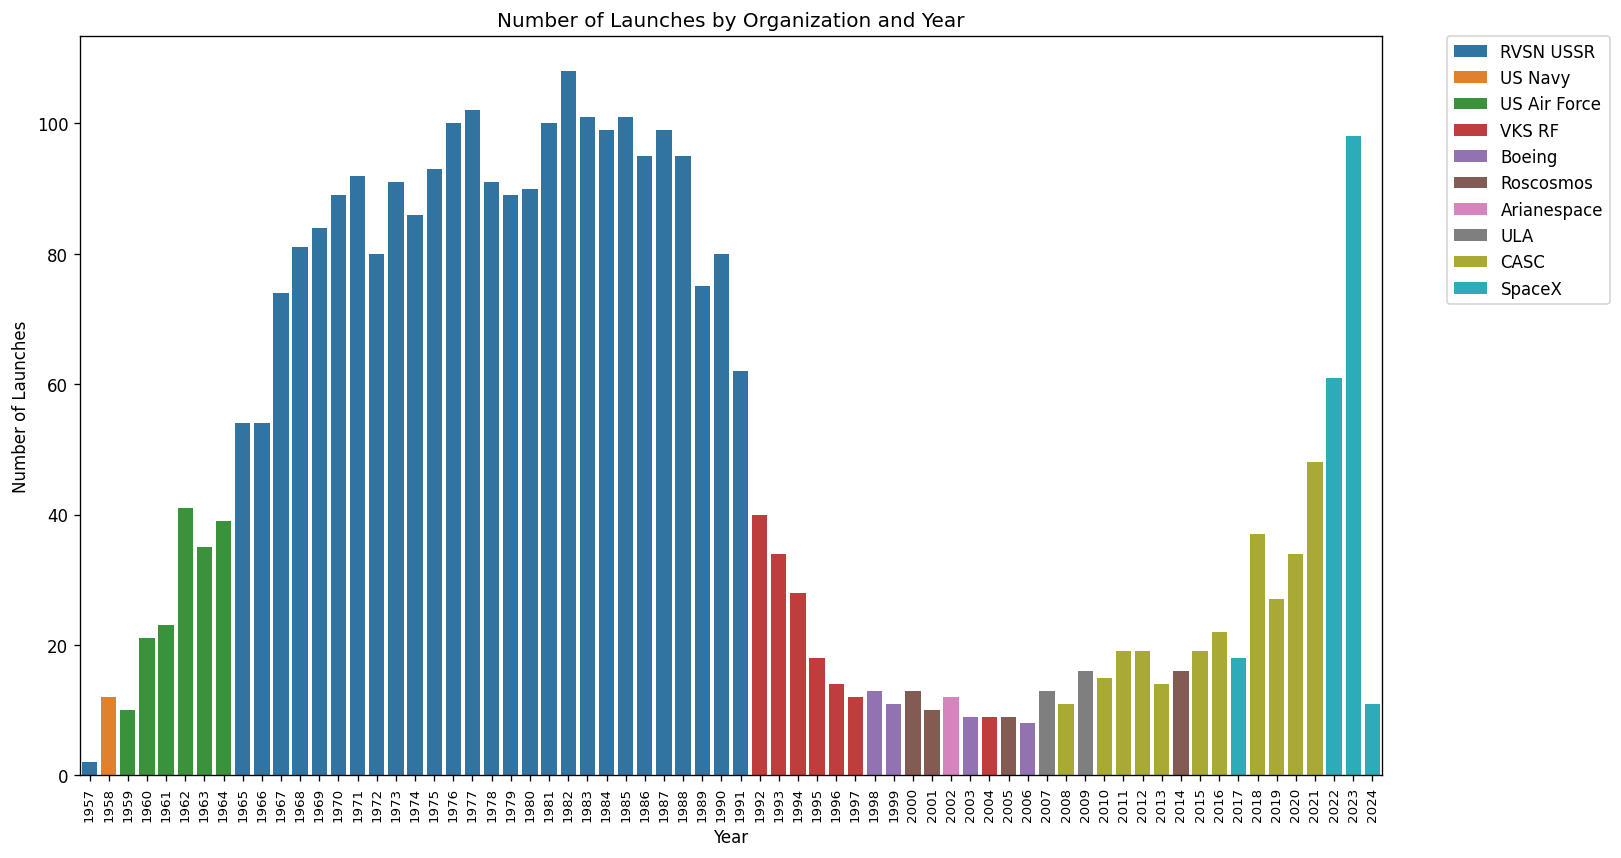

In [ ]:
plt.figure(figsize=(14,8), dpi=120)
sns.barplot(x='year', y='launch_count', hue='Organisation', data=lead_launch_counts_org)
plt.xlabel('Year')
plt.ylabel('Number of Launches')
plt.title('Number of Launches by Organization and Year')
plt.xticks(fontsize=8, rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()